# Math Libraries in Python

### Jupyter Notebook keyboard shortcuts:

`dd` - deletes a cell (*VIM strikes back* :-))

## Import math tools

Let's start with importing packages.

Examples come from [SymPy docs](https://docs.sympy.org/latest/tutorial/intro.html).

__Note__: `from package import *` is not really a good idea, but for sake of this demonstration it's OK.

In [2]:
from sympy import *

Let's see the difference of Python's math and SymPy math.

In [3]:
import math
math.sqrt(8)

2.8284271247461903

This one uses SymPy's `sqrt`.

In [4]:
sqrt(3)

sqrt(3)

In [5]:
sqrt(8)

2*sqrt(2)

### Symbolic computation

In [6]:
x = Symbol('x')
integrate(x**2 + x + 1, x)

x**3/3 + x**2/2 + x

In [7]:
integrate(exp(-x**2) * erf(x), x)

sqrt(pi)*erf(x)**2/4

In [8]:
diff(sin(x)*exp(x), x)

exp(x)*sin(x) + exp(x)*cos(x)

Notice the space between symbols `a` and `b`.

In [9]:
x, y = symbols('x y')
f = x**2 / y + 2*x - ln(y)

In [10]:
diff(f, x)

2*x/y + 2

In [11]:
diff(f, y)

-x**2/y**2 - 1/y

In [12]:
diff(diff(f, x), y)

-2*x/y**2

In [13]:
limit(sin(x)/x, x, 0)

1

Solve $x^2 - 2 = 0$.

In [14]:
solve(x**2 - 2, x)

[-sqrt(2), sqrt(2)]

Find the eigenvalues of $\left[\begin{matrix}1 & 2 \\ 2 & 2\end{matrix}\right]$.

## Pandas & Plotting

[Pandas](https://pandas.pydata.org/) is a data analysis tool.

[Matplotlib](https://matplotlib.org/) is a universal tool for plotting data.

Installation:

```
pip install matplotlib
pip install pandas
```

Let's dig into some movies stats using [ggplot2movies dataset](https://github.com/hadley/ggplot2movies).

## NumPy

[NumPy](https://numpy.org) is the fundamental package for scientific computing in Python [1].

See [NumPy documentation](https://numpy.org/doc/stable/user/index.html) and [NumPy tutorials](https://numpy.org/numpy-tutorials/applications.html). For applied math students there's a [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) guide.

[1] [https://numpy.org/doc/stable/user/whatisnumpy.html](https://numpy.org/doc/stable/user/whatisnumpy.html)

In [15]:
import pandas as pd

df = pd.read_csv('movies.csv')
df

,title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,14.5,...,0.0,24.5,NaN,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58783,tom thumb,1958,98,NaN,6.5,274,4.5,4.5,4.5,4.5,...,4.5,4.5,NaN,0,1,0,0,0,0,0
58784,www.XXX.com,2003,105,NaN,1.1,12,45.5,0.0,0.0,0.0,...,0.0,24.5,NaN,0,0,0,1,0,1,0
58785,www.hellssoapopera.com,1999,100,NaN,6.6,5,24.5,0.0,24.5,0.0,...,24.5,44.5,NaN,0,0,0,0,0,0,0
58786,xXx,2002,132,85000000.0,5.5,18514,4.5,4.5,4.5,4.5,...,4.5,4.5,PG-13,1,0,0,0,0,0,0


In [16]:
#df['year':'length']
yl = df[['year', 'length']]
yl

,year,length
0,1971,121
1,1939,71
2,1941,7
3,1996,70
4,1975,71
...,...,...
58783,1958,98
58784,2003,105
58785,1999,100
58786,2002,132


In [17]:
avg_len = {}
for item in yl.iterrows():
    item_data = item[1]
    y, l = item_data['year'], item_data['length']
    if l < 5:
        continue
    if y in avg_len:
        d = avg_len[y]
        d = (d[0] + l, d[1] + 1)
        avg_len[y] = d
    else:
        avg_len[y] = (l, 1)


In [18]:
for k, v in avg_len.items():
    avg_len[k] = int(v[0] / v[1])

In [19]:
avg_len

{1971: 92,
 1939: 64,
 1941: 66,
 1996: 86,
 1975: 94,
 2000: 80,
 2002: 78,
 1987: 98,
 1917: 51,
 1988: 93,
 1994: 89,
 1906: 15,
 1965: 84,
 1983: 95,
 1980: 95,
 1968: 87,
 1981: 96,
 1995: 88,
 1935: 63,
 1974: 93,
 1921: 66,
 1979: 95,
 1989: 94,
 1945: 70,
 1985: 93,
 1997: 86,
 1966: 84,
 1991: 93,
 1942: 64,
 1946: 69,
 1934: 63,
 1986: 92,
 2001: 80,
 1951: 72,
 1907: 8,
 1940: 66,
 2004: 80,
 1959: 86,
 1932: 58,
 1967: 88,
 1990: 94,
 1973: 94,
 1977: 96,
 1998: 84,
 1978: 94,
 1999: 82,
 1984: 93,
 2005: 86,
 1976: 94,
 1970: 98,
 1958: 84,
 1957: 81,
 1964: 90,
 1954: 75,
 1955: 79,
 2003: 77,
 1960: 90,
 1952: 75,
 1982: 93,
 1969: 93,
 1963: 90,
 1993: 93,
 1956: 79,
 1947: 74,
 1962: 90,
 1937: 64,
 1992: 93,
 1948: 71,
 1972: 93,
 1925: 65,
 1944: 70,
 1933: 62,
 1916: 52,
 1930: 62,
 1931: 63,
 1926: 70,
 1953: 75,
 1928: 66,
 1950: 72,
 1938: 63,
 1936: 60,
 1961: 87,
 1918: 54,
 1949: 73,
 1943: 68,
 1927: 69,
 1914: 41,
 1911: 18,
 1908: 9,
 1924: 71,
 1910: 15,
 

In [20]:
year_min = min(avg_len.keys())
year_max = max(avg_len.keys())

year_min, year_max

(1899, 2005)

In [21]:
lengths = [ v for v in avg_len.values() ]
length_min = min(lengths)
length_max = max(lengths)

length_min, length_max

(5, 98)

#### Filling Polygons Under 3D Line [[1]](https://matplotlib.org/2.0.2/examples/mplot3d/polys3d_demo.html)

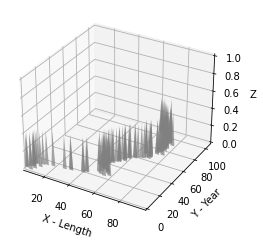

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

avg_len[1900] = 5

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

'''
xs = np.arange(length_min, length_max, 1)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = [ i for i in range(0, year_max - year_min + 1)]#np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
'''

#print(list(avg_len[y]/length_max for y in range(year_min, year_max)))
#print(np.random.rand(len(xs)))

'''
xs = np.arange(length_min, length_max, 1)
#print(xs)
verts = []
zs = [year_min,]#list(range(0, year_max - year_min + 1))
#print(zs)
for z in zs: # years
    #print(z)
    ys = np.arange(len(xs))/len(xs)#np.array(list(avg_len[y]/length_max for y in range(year_min, year_max + 1)))
    #ys = np.arange(0, year_max-year_min + 1)
    #print(ys)
    #ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
'''

#print(verts)

#'''
xs = np.arange(0, 90, 0.8)
verts = []
zs = list(range(0, year_max - year_min + 1))#[0.0, 1.0, 2.0, 3.0, 4.0]
for i, z in enumerate(zs):
    year = i + year_min
    #ys = np.array(list(avg_len[y]/length_max for y in range(year_min, year_max + 1)))#np.arange(len(xs))/len(xs)#np.random.rand(len(xs))
    ys = np.array(list(0.0 for y in range(year_min, year_max + 1)))
    ys[int(avg_len[year])-1] = 0.2
    ys[int(avg_len[year])] = 0.4
    ys[int(avg_len[year])+1] = 0.2
    #ys[3] = 0.5
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
#'''

#print(verts)

poly = PolyCollection(verts, facecolors=[cc('gray'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X - Length')
ax.set_xlim3d(length_min, length_max)
#ax.set_xlim3d(0, 10)
ax.set_ylabel('Y - Year')
ax.set_ylim3d(0, year_max -year_min + 1)
#ax.set_ylim3d(0, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

[Ridgeline plot](https://glowingpython.blogspot.com/2020/03/ridgeline-plots-in-pure-matplotlib.html)